In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
from sklearn import metrics
import numpy as np

In [11]:
#Read yelp.csv into a DataFrame. Already getting plenty of experience with JSON objects with my final project :)
yelp = pd.read_table("../../DAT-DC-10/data/yelp.csv", sep = ',')

In [5]:
yelp.head(50)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


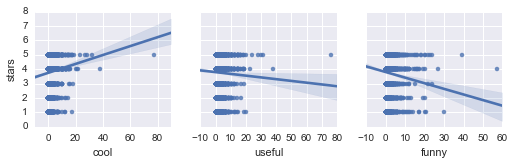

In [8]:
#Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.
feature_cols = ['cool', 'useful', 'funny']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

(0, 5)

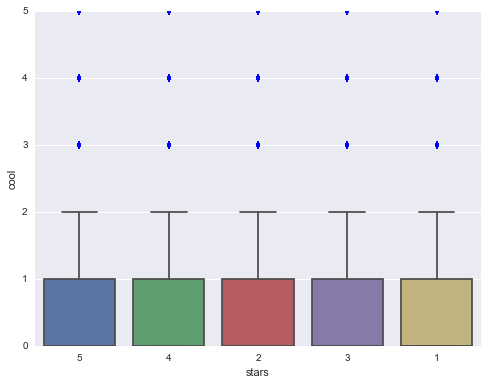

In [13]:
sns.boxplot(x="stars",y="cool",data=yelp)
plt.ylim(0, 5)

I was very intruiged by the results that I found in my preliminary visualizations. It made sense that the more "cool" votes a review received, it would have a higher overall star rating. It was misleading to me that there was a negative trend for both "useful" and "funny" comments, but on second thought, neither of these factors would necessarilly correlate to a higher star rating for a business.

In [14]:
#Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? 
#Explore the Yelp website to see if you detect similar trends.
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print linreg.intercept_
print linreg.coef_
zip(feature_cols, linreg.coef_)

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


[('cool', 0.27435946858852989),
 ('useful', -0.14745239099401236),
 ('funny', -0.13567449053706199)]

The coefficients do make intuitive sense to me based off what I saw in the visualizations. For our intercept value, we would interpret that as assuming a yelp review recevied no "cool", "funny" or "useful" votes, the average number of stars a yelp review would give a business is 3.839.

* Assuming all other variables constant, an increase in one "cool" vote corresponds to an **increase** in .275 of a businesses star rating
* Assuming all other variables constant, an increase in one "useful" vote corresponds to an **decrease** in .147 of a businesses star rating
* Assuming all other variables constant, an increase in one "funny" vote corresponds to an **decrease** in .136 of a businesses star rating

In [12]:
#Evaluate the model by splitting it into training and testing sets and computing the RMSE. 
#Does the RMSE make intuitive sense to you?

feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

#train/test split?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    
#create a model; fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
#return the error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.1733686274194506

In my own words, RMSE takes the squares of all the errors between the test values and the model. We then divide this sum of squares by the number of observations in the test dataset to get an average. Finally, we take the square root of this number so that our final value is in terms of "y" units.

In [32]:
#Try removing some of the features and see if the RMSE improves.
feature_cols = ['funny', 'cool', 'useful']
X = yelp[feature_cols]
y = yelp.stars

#train/test split?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    
#create a model; fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
#return the error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.1733686274194501

In all cases, when we reduce the number of features the RMSE get worse.

In [27]:
#Bonus: Compare your best RMSE on the testing set with the RMSE for the "null model", 
#which is the model that ignores all features and simply predicts the mean response value in the testing set.

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())

np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2019781029619465

In [ ]:
#Bonus: Instead of treating this as a regression problem, 
#treat it as a classification problem and see what testing accuracy you can achieve with KNN

Would love to get some instructor feedback on the logic here - My thoughts here are that we are currently treating our response variable of "stars" as a continuous variable by using regression. We can also look at "stars" as a categorical variable, because it can only take on values 1, 2, 3, 4 or 5.

In [66]:
knn = KNeighborsClassifier(n_neighbors=20)

In [67]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=20, p=2, weights='uniform')

In [68]:
y_pred = knn.predict(X)

In [69]:
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.366


In [83]:
new_yelp = yelp[(yelp.stars==1) | (yelp.stars==2)]
new_yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
15,Vb9FPCEL6Ly24PNxLBaAFw,2011-03-20,HvqmdqWcerVWO3Gs6zbrOw,2,Was it worth the 21$ for a salad and small piz...,review,ylWOj2y7TV2e3yYeWhu2QA,0,2,0
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3
56,tA2DT7CGQPzgA6tTcTkXDw,2009-09-02,VyX6x7wnThr9g9Z6VBDIgA,2,I have to add to Andrew's review.....\n\nI jus...,review,UL9chyH0a4Pj8J_9M6WSpA,1,2,2
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0


In [88]:
#Bonus: Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.
from sklearn.linear_model import LinearRegression

# get feature/predictor matrix as numpy array
X = new_yelp.cool
y = new_yelp.stars

# encode class labels
#classes, y = np.unique(new_yelp.default.stars, return_inverse=True)
y = y-1
y = (y * 2) - 1  # map {0, 1} to {-1, 1}


In [95]:
type(y)

pandas.core.series.Series

In [92]:

# fit OLS regression 
est = LinearRegression(fit_intercept=True, normalize=True)
est.fit(X, y)

# plot data and decision surface
ax = plt.gca()
ax.scatter(new_yelp.stars, new_yelp.cool, cmap=cm_bright)
try:
    plot_surface(est, X[:, 0], X[:, 1], ax=ax)
except NameError:
    print('Please run cells in Appendix first')

ValueError: Found arrays with inconsistent numbers of samples: [   1 1676]